# CS4168 - Group Project

Group members:
- Italo Terto da Silva (ID: 21326312 )
- Szymon Szulc (ID: 21323208 )
- Boris Bobylkov (ID: 21317097 )
- Craig Phayer (ID: 21340633 )
- Martynas Danys (ID: 21315884 )

All group members contributed equally to the project. 20% of the contribution will be given to each member.

Import Libraries

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import manifold, preprocessing, cluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MaxAbsScaler, Normalizer
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('future.no_silent_downcasting', True)

## Exploratory Data Analysis

Perform exploratory data analysis of the dataset. Comment on your observations.

In [184]:
dataset = pd.read_csv('tracks.csv')
dataset.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [185]:
dataset.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1500 non-null   int64  
 1   duration_ms       1500 non-null   int64  
 2   explicit          1500 non-null   bool   
 3   danceability      1500 non-null   float64
 4   energy            1500 non-null   float64
 5   key               1500 non-null   int64  
 6   loudness          1500 non-null   float64
 7   mode              1500 non-null   int64  
 8   speechiness       1500 non-null   float64
 9   acousticness      1500 non-null   float64
 10  instrumentalness  1500 non-null   float64
 11  liveness          1500 non-null   float64
 12  valence           1500 non-null   float64
 13  tempo             1500 non-null   float64
 14  time_signature    1500 non-null   int64  
 15  track_genre       1500 non-null   object 
dtypes: bool(1), float64(9), int64(5), object(1

In [187]:
dataset.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


### Data normalisation:
• Popularity: get the median, popularity ? 0 : 1 based on the median

• Duration: Normalising

• Danceability: Normalise to get rid of spikes

• Energy: Normalise to get rid of spikes

• Key: categorical -> One-Hot encoding

• Loudness: Normalisation to get rid of left skew

• Speechiness: Normalise to get rid of skew

• Acousticness: Normalise

• Instrumentalness: Normalise

• Liveness: Normalise

• Valence: Normalise skew

• Tempo: Normalise spike

• Time Signature: categorical -> One-Hot encoding

• Track_genre: drop da shit

----------------------------

duration_ms: Normalize (Min-Max or Standard Scaling).

explicit: Convert boolean to integer (True → 1, False → 0).

danceability to valence (all float columns): These are already in [0,1] or close — check distribution, but usually safe to leave as is or use Standard Scaler for algorithms sensitive to variance.

key, mode, time_signature: These are categorical integers. Use one-hot encoding or leave as-is if using tree-based models.

loudness, tempo: These are floats, usually benefit from standard scaling.


In [188]:
pop_mean = dataset['popularity'].median()
dataset['popular'] = (dataset['popularity'] >= pop_mean).astype(int)
dataset.drop(columns=['popularity'], inplace=True)

numeric_cols = dataset.select_dtypes(include=[np.number]).columns.drop('popular')

categorical_cols = ['explicit', 'mode', 'key', 'time_signature', 'track_genre']
right_skewed = ['speechiness', 'liveness', 'tempo']
left_skewed = ['energy', 'loudness', 'acousticness', 'instrumentalness', 'valence']

def fix_right_skew(X):
    return np.log1p(np.sqrt(X) * 100)
    # return X

def fix_left_skew(X):
    return np.log1p(np.sqrt(X.max(axis=0) + 1 - X) * 100)
    # return X


right_skew_pipeline = Pipeline([
    ("log1p", FunctionTransformer(fix_right_skew, validate=False)),
    ("min_max", MaxAbsScaler()),
    ("normalizer", Normalizer())
])

left_skew_pipeline = Pipeline([
    ("reflect_log1p", FunctionTransformer(fix_left_skew, validate=False)),
    ("min_max", MaxAbsScaler()),
    ("normalizer", Normalizer())
])

preprocessor = ColumnTransformer(transformers=[
    ("right_skew", right_skew_pipeline, right_skewed),
    ("left_skew", left_skew_pipeline, left_skewed),
    ("one_hot", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

test_pipeline = Pipeline([
    ("preprocessing", preprocessor)
])

X = dataset.drop(columns=['popular', 'duration_ms'])
y = dataset['popular']

# After fitting the pipeline:
X_transformed_array = test_pipeline.fit_transform(X)

# Get the column names for the one-hot encoded features
one_hot_encoder = test_pipeline.named_steps['preprocessing'].named_transformers_['one_hot']
one_hot_feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)

# Combine all feature names
feature_names = (
    right_skewed +
    left_skewed +
    list(one_hot_feature_names) +
    ['danceability']
)

# Now this will work without error:
X_transformed = pd.DataFrame(X_transformed_array, columns=feature_names)
X_transformed.head(100)

,speechiness,liveness,tempo,energy,loudness,acousticness,instrumentalness,valence,explicit_True,mode_1,...,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,track_genre_dance,track_genre_opera,danceability
0,0.475374,0.554880,0.682735,0.440917,0.420750,0.457433,0.459615,0.456147,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.658
1,0.512914,0.509823,0.690652,0.445543,0.421147,0.454037,0.458464,0.455837,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.627
2,0.489073,0.575490,0.655454,0.442740,0.410245,0.467947,0.453504,0.459390,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.807
3,0.497479,0.570176,0.653769,0.453236,0.403659,0.468115,0.444284,0.463807,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.748
4,0.480440,0.573727,0.663336,0.444953,0.403318,0.471781,0.445947,0.466804,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.500036,0.616457,0.608231,0.439612,0.388178,0.471357,0.471573,0.459893,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.681
96,0.514395,0.488519,0.704802,0.440865,0.396687,0.471216,0.471675,0.451393,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.577
97,0.510416,0.510764,0.691806,0.447269,0.393362,0.469424,0.469503,0.452133,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.687
98,0.463211,0.567410,0.680794,0.456525,0.422355,0.435849,0.464226,0.455774,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.464


## Clustering

Construct and train clustering pipelines for k-means and DBSCAN. When clustering drop the column track_genre. For k-means find the best value of k. Visualise the clusterings and discuss their usefulness for a better understanding of the underlying patterns in the dataset.

#### Scatterplot for visualising clustering

In [189]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):


    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

Taking only required columns for clustering and scale it properly

In [190]:
X_transformed = X_transformed[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

feature_names = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness',
                 'valence', 'tempo']

X_transformed = preprocessing.scale(X_transformed)

#### k-Means Clustering

In [191]:
k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(X_transformed)

In [192]:
data_and_centers = np.r_[X_transformed,clustered_data_sklearn.cluster_centers_]

In [193]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


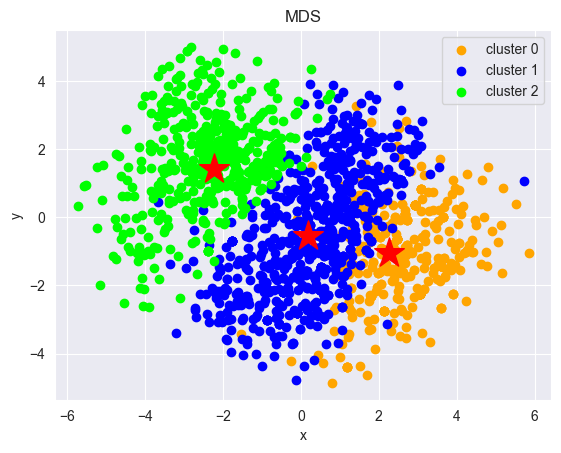

In [194]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='MDS')

In [195]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


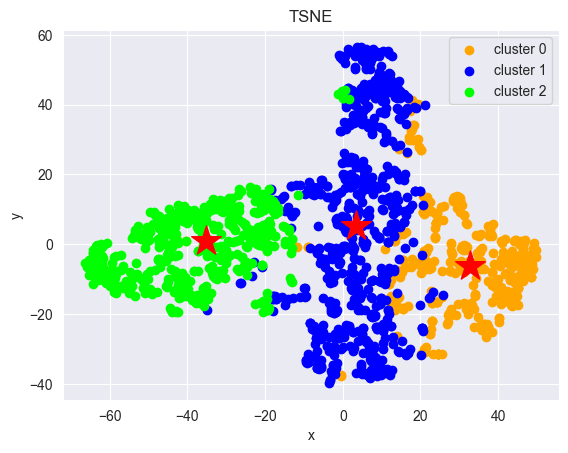

In [196]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='TSNE')

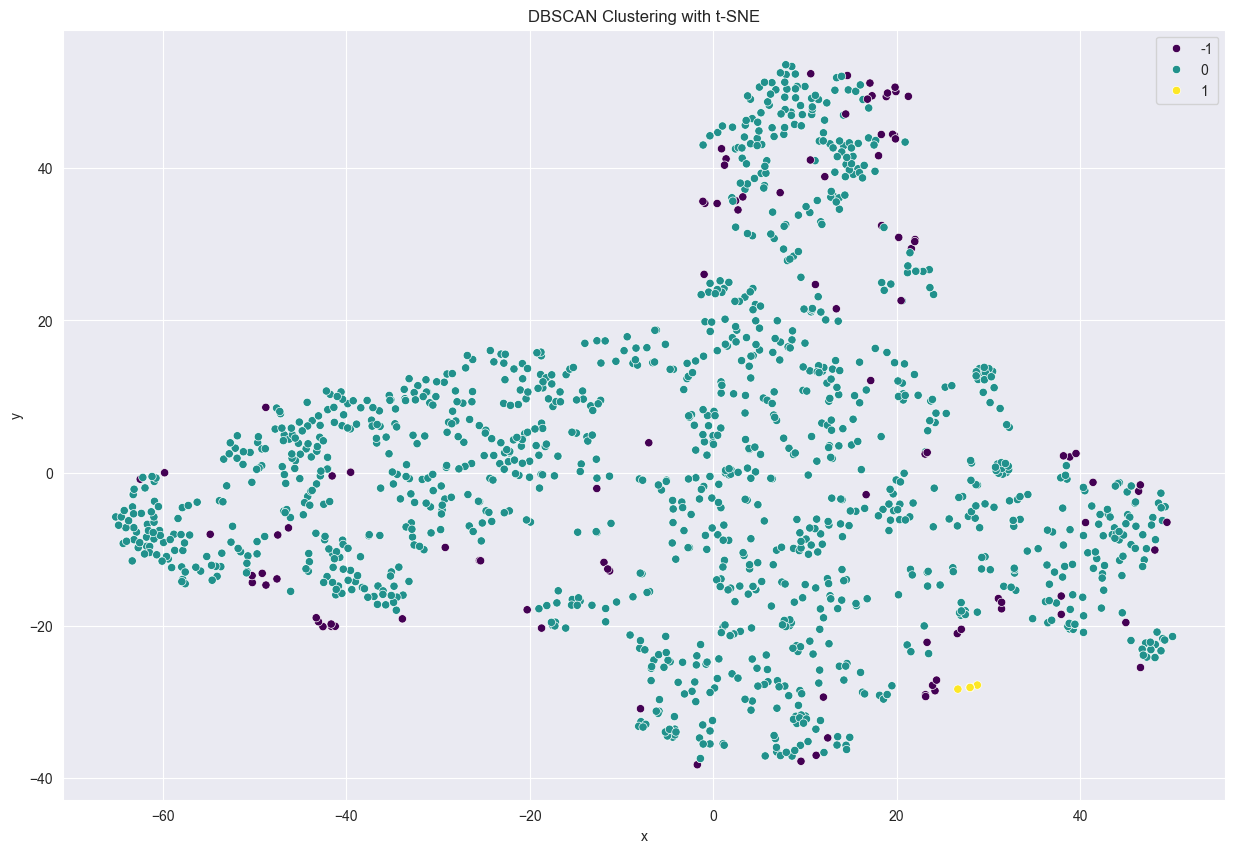

In [197]:
dbscan = DBSCAN(eps=1.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_transformed)

dataset_dbscan = dataset.copy()
dataset_dbscan["DBSCAN_Cluster"] = dbscan_labels

tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(X_transformed)

plt.figure(figsize=(15, 10))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=dbscan_labels, palette="viridis", legend="full")
plt.title("DBSCAN Clustering with t-SNE")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Cluster Analysis

In [198]:
X_transformed = pd.DataFrame(X_transformed, columns=feature_names)
X_transformed['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=X_transformed.index)

In [199]:
X_transformed.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.566079,-1.396016,0.723111,-0.505773,0.088478,-0.200147,-0.040956,-0.040064,0.670992,1
1,0.416004,-0.622156,0.750129,0.528692,-0.149840,-0.322828,-1.319502,-0.087957,0.988402,1
2,1.287406,-1.091002,0.008079,-0.128282,0.826326,-0.851642,0.543844,0.460890,-0.422825,1
3,1.001780,0.664879,-0.440220,0.103357,0.838101,-1.834537,0.393058,1.143087,-0.490352,1
4,0.687107,-0.720889,-0.463440,-0.366185,1.095373,-1.657256,0.493833,1.606015,-0.106781,1


#### Computing mean value of each attribute for each cluster

In [200]:
X_transformed.groupby('cluster').mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.928948,-0.347321,-0.542252,1.339891,0.629970,0.595709,-0.883259,-0.803609,-0.487345
1,0.260149,-0.622059,-0.471980,-0.370398,0.588153,0.021857,0.276718,0.235491,0.101397
2,-1.114559,1.195332,1.125554,-0.501350,-1.366713,-0.499651,0.282196,0.280893,0.231792


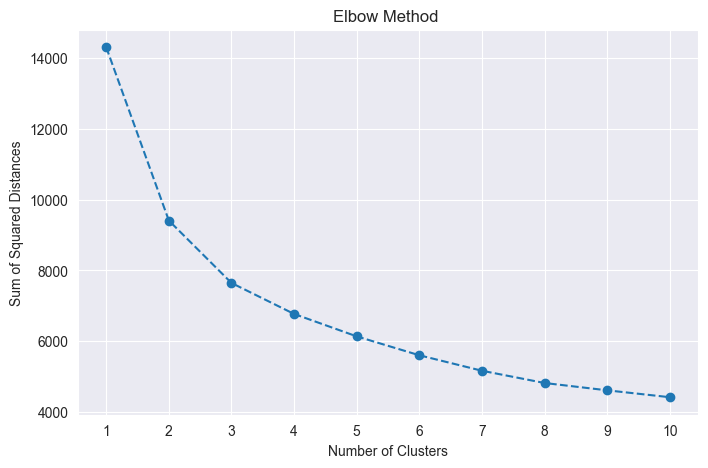

In [201]:
k_values = range(1, 11)
squared_sum = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_transformed)
    squared_sum.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, squared_sum, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method ")
plt.xticks(k_values)
plt.show()

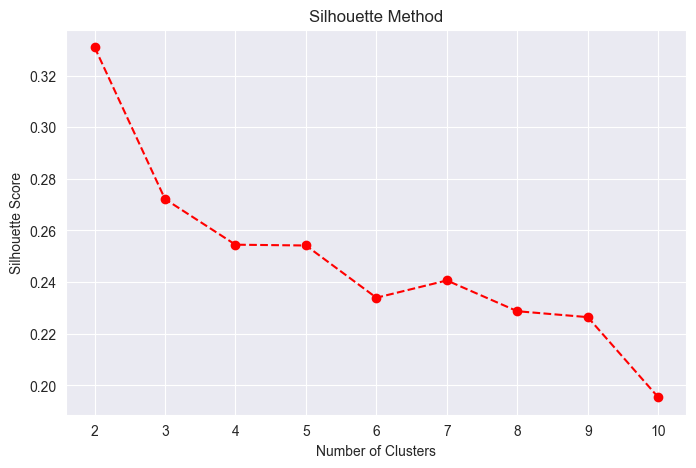

In [202]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_transformed)
    score = silhouette_score(X_transformed, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="--", color="r")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.xticks(k_values)
plt.show()

## Classification

Let m be the median of column popularity. Replace column popularity with a binary column popularity_binary with two values: 0 for popularity ≤ m and 1 for popularity > m. Attempt at least three different classification algorithms for training models that can be used for predicting the value of popularity_binary. Construct a pipeline for each of the algorithms you have chosen. Evaluate the trained models and select the best model. Explain your choice in a markdown cell. Aim at training a model that is as good as possible. In this process, you may attempt various data preparation and possibly dimensionality reduction strategies.